<a href="https://colab.research.google.com/github/WandersonGustavo/Imersao_Alura/blob/main/Projeto_Final_DB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Projeto final :objetivo tratar e modelar  base de dados de um db postgres de uma empresa a fim de prever inadimplência dos clientes e reduzir de 35 para 20%

In [ ]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.linear_model import LinearRegression
from datetime import datetime
import seaborn as srn
import statistics as sts
#registro de converters para uso do matplotlib
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix

In [ ]:
#import psycopg2

In [ ]:
base=pd.read_csv('Credit.csv')
base

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,<0,6,'critical/other existing credit',radio/tv,1169,'no known savings',>=7,4,'male single',none,...,'real estate',67,none,own,2,skilled,1,yes,yes,good
1,0<=X<200,48,'existing paid',radio/tv,5951,<100,1<=X<4,2,'female div/dep/mar',none,...,'real estate',22,none,own,1,skilled,1,none,yes,bad
2,'no checking',12,'critical/other existing credit',education,2096,<100,4<=X<7,2,'male single',none,...,'real estate',49,none,own,1,'unskilled resident',2,none,yes,good
3,<0,42,'existing paid',furniture/equipment,7882,<100,4<=X<7,2,'male single',guarantor,...,'life insurance',45,none,'for free',1,skilled,2,none,yes,good
4,<0,24,'delayed previously','new car',4870,<100,1<=X<4,3,'male single',none,...,'no known property',53,none,'for free',2,skilled,2,none,yes,bad
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,'no checking',12,'existing paid',furniture/equipment,1736,<100,4<=X<7,3,'female div/dep/mar',none,...,'real estate',31,none,own,1,'unskilled resident',1,none,yes,good
996,<0,30,'existing paid','used car',3857,<100,1<=X<4,4,'male div/sep',none,...,'life insurance',40,none,own,1,'high qualif/self emp/mgmt',1,yes,yes,good
997,'no checking',12,'existing paid',radio/tv,804,<100,>=7,4,'male single',none,...,car,38,none,own,1,skilled,1,none,yes,good
998,<0,45,'existing paid',radio/tv,1845,<100,1<=X<4,4,'male single',none,...,'no known property',23,none,'for free',1,skilled,1,yes,yes,bad


In [ ]:
#agrupando os dados da class
baseAgrupada=base.groupby(['class']).size()
baseAgrupada

In [ ]:
base.describe

In [ ]:
base.isnull().sum()
#nenhum valor null

In [ ]:
#base checando numeros fora da realidade na idade
base.loc[(base['age']< 0)|(base['age']>120)]

In [ ]:
base.duplicated(['credit_amount'], keep=False)
base.drop_duplicates(subset='credit_amount',keep='first',inplace=True)


In [ ]:
grupo=base.groupby(['credit_amount']).describe()
grupo
#tratar std

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Credit Amount')

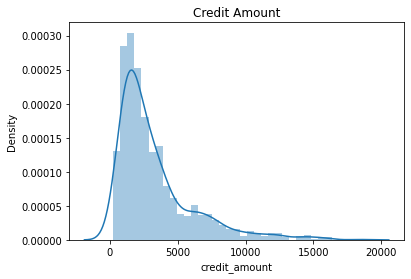

In [ ]:
#baseAgrupada.plot.bar(color= 'pink')
srn.distplot(base['credit_amount']).set_title('Credit Amount')

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Credit Amount')

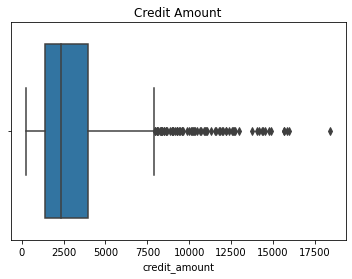

In [ ]:
#base.groupby('duration')
srn.boxplot(base['credit_amount']).set_title('Credit Amount')

In [ ]:
base.describe

In [ ]:
base['class'].isnull().sum()

0

In [ ]:
base.describe

In [ ]:
colNumber=base.columns.get_loc('credit_amount')
colNumber

4

In [ ]:
#relacao duracao e idade , idade==x e duracao==y
X = base.iloc[:,4].values
y = base.iloc[:,11].values
X

In [ ]:
#correlacao = np.corrcoef(X, y)
#correlacao

In [ ]:
X = X.reshape(-1, 1)
modelo = LinearRegression()
modelo.fit(X, y)

LinearRegression()

In [ ]:
modelo.intercept_

12.168902198241387

In [ ]:
modelo.coef_

array([0.00266995])

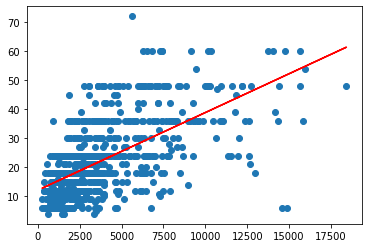

In [ ]:
plt.scatter(X, y)
plt.plot(X, modelo.predict(X), color = 'red')